# Merger rate density model comparision

## Introduction

Here is a summary comparing the binary black hole (BBH) merger density distribution between BBH from Population I/II (Pop I/II) stars, BBH from Pop III stars, and primordial black holes (PBHs):

| BBH type                | Merger rate density distribution                                  | Peak value                               |
|-------------------------|---------------------------------------------------------------------|------------------------------------------|
| Pop I/II stars          | Peaks at redshift $z \sim 1-2$, and declines ever since            | $\sim 150–300 \, \text{Gpc}^{-3} \, \text{yr}^{-1}$  |
| Pop III stars           | Peaks at redshift $z \sim 8–16$, and declines rapidly at higher redshifts | $\sim 2–30 \, \text{Gpc}^{-3} \, \text{yr}^{-1}$ |
| Primordial black holes  | Unknown, expected to have a power-law dependence on the age of the Universe | Expected to be higher at high redshifts |

* The BBH merger density distribution from Pop I/II stars is well-studied, while the BBH merger density distribution from Pop III stars and PBHs is much less well-studied.

* Astronomers are interested in studying the BBH merger density distribution from Pop III stars and PBHs, as they would provide important information about the early Universe.

* The next generation of gravitational wave observatories, such as the Einstein Telescope and the Cosmic Explorer, are expected to be able to detect BBHs formed from Pop III stars.

## BBH/BNS merger rate at source redshift $z_s$ (in small dz)

* $R(z_s)$: Source frame merger rate density at source redshift $z_s$.

$$ R(z_s) = \frac{\mathcal{R}_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} $$

* $\mathcal{R}_m(z_s)$: detector frame merger rate density at source redshift $z_s$.
* co-moving volume : $\frac{dV_c}{dz_s}$.
* $\frac{1}{1+z_s}$: this factor takes care of the time dilation effect.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# calling necessary class from ler package
from ler.gw_source_population import CBCSourceRedshiftDistribution

In [3]:
z_min = 0.0
z_max = 40.0
z = np.geomspace(0.01, 40.0, 500)

## BBH/BNS pop I/II Oguri et al. 2018 model

* LeR default Merger rate follows [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf).
* It is a functional fit to the population I/II star merger-rate density normalized to the local merger- rate density following Oguri (2018). 
* This model follows from the M10 model to the Belczynski et al. (2017), which is arrived from Madau & Dickinson (2014) with the inclusion of the metallicity dependence of the star formation rate, which is bassically the effect related to pair-instability supernova (PSN) and  pair-instability pulsation supernova (PPSN). 

\begin{equation}
\mathcal{R}_m(z_s) = \frac{\mathcal{R}_O(b_4+1)e^{b_2 z_s}}{b_4+e^{b_3 z_s}} \text{Gpc}^{-3}\text{yr}^{-1} \tag{1}
\end{equation}
* $z_s$: redshift of source
* $\mathcal{R}$: local mergerrate. $\mathcal{R}=23.9^{+14.3}_{-8.6}\text{Gpc}^{-3}\text{yr}^{-1}=23.9^{+14.3}_{-8.6} \times 10^{-9}\text{Mpc}^{-3}\text{yr}^{-1}$
* fitting parameters: $b_2=1.6$, $b_3=2.1$, $b_4=30$

* with results from [GWTC-3, PDB (pair) model](https://arxiv.org/pdf/2111.03634.pdf):

| Model | $\mathcal{R}_O$     |
|-------|---------------------|
| BNS   | $170^{+270}_{-120}$ |
| BBH   | $25^{+10}_{-7}$     |
| NSBH  | $27^{+31}_{-17}$    |


In [5]:
# BBH pop I/II Oguri et al. 2018 model
cbc = CBCSourceRedshiftDistribution(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
    merger_rate_density_param=dict(R0=25.*1e-9, b2=1.6, b3=2.0, b4=30),
    )

# detector frame
rate1_det = cbc.merger_rate_density(z)

# source frame
rate1_src = cbc.pdf_z(z)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_3.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_4.pickle


In [6]:
%timeit rate1_det = cbc.merger_rate_density(z)  # this is njit compiled function, and it is fast

2.94 µs ± 7.62 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Star formation rate

* Madau and Dickinson's 2014 paper, titled ["Cosmic Star-Formation History"](https://www.annualreviews.org/doi/pdf/10.1146/annurev-astro-081811-125615) provides a comprehensive overview of the star formation rate in the universe
* Madau and Dickinson identify a peak in the star formation rate around redshifts of 1 to 2, corresponding to a critical period in the universe's history when galaxies were forming stars at a significantly higher rate.
* Extinction-corrected cosmic star formation rate is given below. Extinction refers to the process by which starlight is absorbed and scattered by dust and gas in galaxies, making it appear fainter and altering the observed spectrum. This is also Eqn. 1 in [Belczynski et al. 2016](https://arxiv.org/pdf/1602.04531.pdf). Also refer to [Belczynski et al. 2017](https://arxiv.org/pdf/1612.01524.pdf) for the metallicity dependence of the star formation rate.

\begin{equation}
\psi(z) = 0.015 \frac{(1+z)^{2.7}}{1+[(1+z)/2.9]^{5.6}} \text{M}_\odot \text{yr}^{-1} \text{Mpc}^{-3} \tag{2}
\end{equation}

In [11]:
# Star formation rate Madau & Dickinson 2014
cbc = CBCSourceRedshiftDistribution(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="star_formation_rate_madau_dickinson2014",
    merger_rate_density_param=dict(af=2.7, bf=5.6, cf=2.9),
    )

# detector frame
rate2_det = cbc.merger_rate_density(z)
# source frame
# normalised to 1
rate2_src = cbc.pdf_z(z)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_3.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
star_formation_rate_madau_dickinson2014 interpolator will be loaded from ./interpolator_pickle/star_formation_rate_madau_dickinson2014/star_formation_rate_madau_dickinson2014_2.pickle


## BBH pop III model, Ng et al. 2022

* This model is based on the section II B [Ng et al. 2022](https://arxiv.org/pdf/2204.11864.pdf) paper.
* Its a phenomenological model for the volumetric merger rate density of Pop III BBHs.
* This model is a simple fit to the merger rate density predicted from population synthesis studies.

\begin{equation}
\dot{n}_{III} = n_o \frac{e^{a_{III}(z_s-z_{III})}}{a_{III}+b_{III} e^{(a_{III}+b_{III})(z_s-z_{III})}} \text{Mpc}^{-3}\text{yr}^{-1} \tag{3}
\end{equation}

* $z_s$: redshift of source
* $n_o$: Normalization factor. $a_{III}$, $b_{III}$, $z_{III}$ are fitting parameters.
* $n_o=19.2\times 10^{-9}$, $a_{III}=0.66$, $b_{III}=0.3$, $z_{III}=11.6$




In [7]:
# pop III Ng et al. 2022
cbc = CBCSourceRedshiftDistribution(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="merger_rate_density_bbh_popIII_ken2022"
    )

# detector frame
rate3_det = cbc.merger_rate_density(z)
# source frame
# normalised to 1
rate3_src = cbc.pdf_z(z)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_3.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
merger_rate_density_bbh_popIII_ken2022 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popIII_ken2022/merger_rate_density_bbh_popIII_ken2022_3.pickle


# Primordial BBH model, Ng et al. 2022

* This model is based on the section II A [Ng et al. 2022](https://arxiv.org/pdf/2204.11864.pdf) paper.
* the volumetric merger rate density of PBHs has a power-law dependence on the age of the Universe $t(z)$ extending up to $z \gtrsim 10^3$.

\begin{equation}
\dot{n}_{PBH} = n_o \left(\frac{t(z)}{t_o}\right)^{-34/37} \text{Mpc}^{-3}\text{yr}^{-1} \tag{4}
\end{equation}

* $z_s$: redshift of source
* $n_o$: Normalization factor. $t_o$ is the present age of the Universe.
* $n_o=0.044\times 10^{-9}$, $t_o=13.786885302009708$

In [8]:
# primordial black holes Ng et al. 2022
cbc = CBCSourceRedshiftDistribution(
        z_min=z_min,
        z_max=z_max,
        merger_rate_density="merger_rate_density_bbh_primordial_ken2022")

# detector frame
rate4_det = cbc.merger_rate_density(z)
# source frame
# normalised to 1
rate4_src = cbc.pdf_z(z)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_3.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
INFO:numba.core.transforms:finding looplift candidates


merger_rate_density_bbh_primordial_ken2022 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_primordial_ken2022/merger_rate_density_bbh_primordial_ken2022_0.pickle


## Plots and comparison

### reproduction of Ng et al. 2022 [Fig. 3](https://arxiv.org/pdf/2204.11864.pdf)

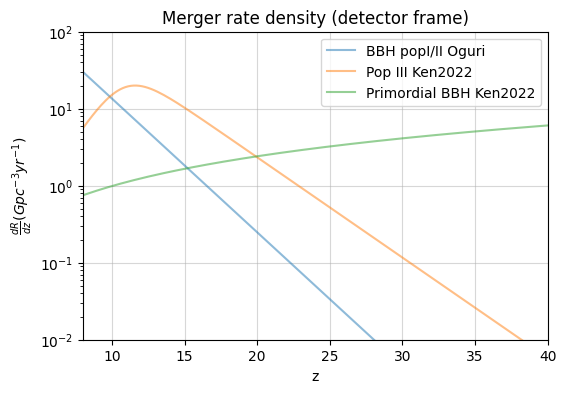

In [9]:
# normalization factor is different
# plot the merger rate density (detector frame)
# factor 1e9 is to convert to Gpc^-3 yr^-1 from Mpc^-3 yr^-1
plt.figure(figsize=(6,4))
plt.plot(z, rate1_det*1e9, color='C0', linestyle='-', alpha=0.5, label="BBH popI/II Oguri")
plt.plot(z, rate3_det*1e9, color='C1', linestyle='-', alpha=0.5, label="Pop III Ken2022")
plt.plot(z, rate4_det*1e9, color='C2', linestyle='-', alpha=0.5, label="Primordial BBH Ken2022")
# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{dR}{dz} (Gpc^{-3} yr^{-1})$")
plt.yscale("log")
plt.xlim(8, 40)
plt.ylim(1e-2, 1e2)
plt.legend()
plt.grid(alpha=0.5)
plt.title("Merger rate density (detector frame)")
plt.show()


### Merger rate density (source frame)

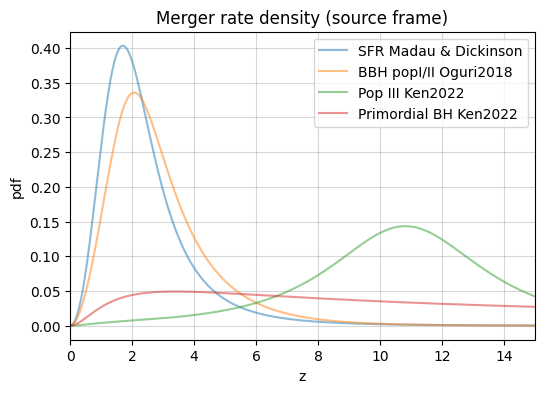

In [12]:
# plot the pdf of zs (source frame)
plt.figure(figsize=(6,4))
plt.plot(z, rate2_src, color='C0', linestyle='-', alpha=0.5, label="SFR Madau & Dickinson")
plt.plot(z, rate1_src, color='C1', linestyle='-', alpha=0.5, label="BBH popI/II Oguri2018")
plt.plot(z, rate3_src, color='C2', linestyle='-', alpha=0.5, label="Pop III Ken2022")
plt.plot(z, rate4_src, color='C3', linestyle='-', alpha=0.5, label="Primordial BH Ken2022")
# labels
plt.xlabel("z")
plt.ylabel(r"pdf")
#plt.yscale("log")
plt.xlim(0, 15)
plt.legend()
plt.grid(alpha=0.5)
plt.title("Merger rate density (source frame)")
plt.show()

## Conclusion

* The merger rate density of binary black hole (BBH) mergers from Population III (Pop. III) stars, primordial black holes (PBHs), and Population I/II (Pop. I/II) stars is a topic of active research. All three models suggest that BBH mergers are a common occurrence in the universe, but there is still a significant range of uncertainty in the merger rate density and mass spectrum of BBH mergers from each channel. Future observations of gravitational waves from merging BBHs will help to constrain these uncertainties and provide valuable insights into the formation and evolution of black holes and binary star systems.

* In particular, Einstein Telescope and Cosmic explorer, next-generation gravitational wave detectors (3G), are expected to detect a significant number of BBH mergers from all three channels. This will provide a wealth of new information about the formation and evolution of black holes and binary star systems.

## Bonus plot

* Star formation rate (SFR) vs redshift

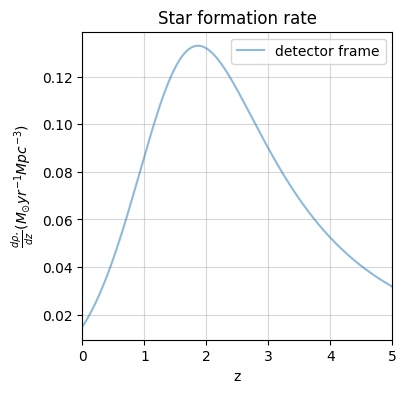

In [14]:
# plot star formation rate distribution wrt redshift
zs = np.geomspace(0.01, 5.0, 10000)
plt.figure(figsize=(4,4))
plt.plot(zs, cbc.star_formation_rate_madau_dickinson2014(zs), color='C0', linestyle='-', alpha=0.5, label="detector frame")
# plt.plot(zs, cbc.merger_rate_density_src_frame(zs)/(1+zs) * cbc.differential_comoving_volume(zs), color='C1', linestyle='-', alpha=0.5, label="source frame")
# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{d\rho_{\star}}{dz} (M_{\odot} yr^{-1} Mpc^{-3})$")
plt.xlim(0, 5)
plt.legend()
plt.grid(alpha=0.5)
plt.title("Star formation rate")
plt.show()